<a href="https://colab.research.google.com/github/Ashitha-K/Assignment/blob/main/Ashitha_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the dataset
data=pd.read_csv('/content/car_age_price.csv')
data.head()


,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [ ]:
data.shape

(112, 2)

Checking for null values

In [ ]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

checking for outliers

In [ ]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


<Axes: >

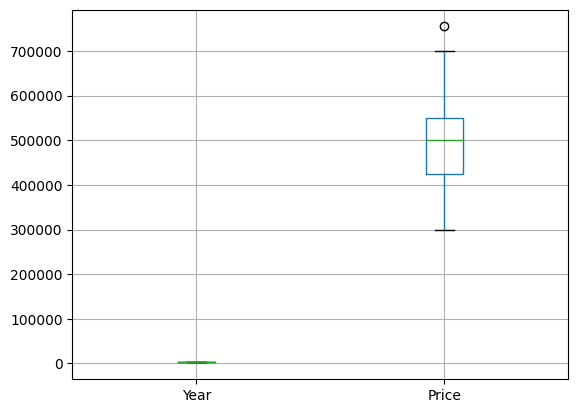

In [ ]:
data.boxplot()

In [ ]:
outlier=['Price']
Q1=data[outlier].quantile(0.25)
Q3=data[outlier].quantile(0.75)
IQR=Q3-Q1

In [ ]:
data[outlier]=data[outlier].clip(lower = Q1-1.5*IQR, upper = Q3+1.5*IQR, axis = 1)

<Axes: >

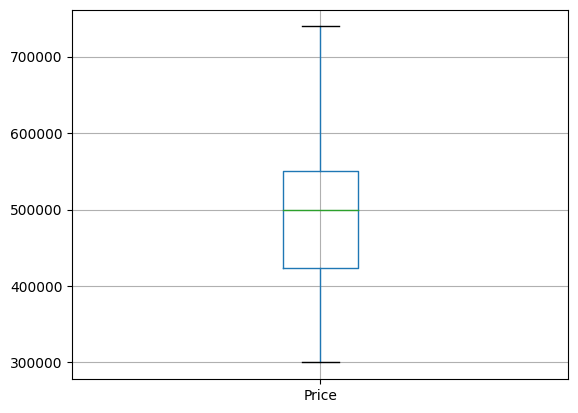

In [ ]:
data.boxplot(outlier)

Ploting the correlation

<Axes: >

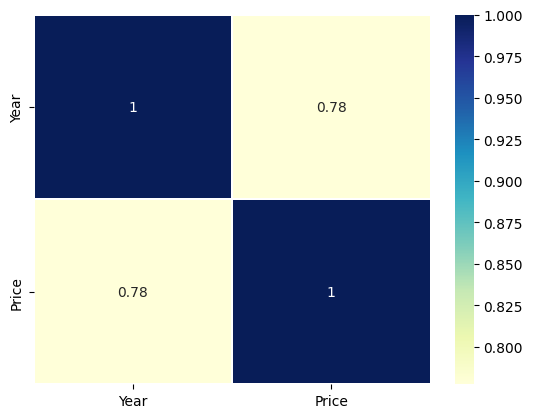

In [ ]:
corr_data=data.corr()
sns.heatmap(corr_data,annot=True,linewidth=0.2,cmap='YlGnBu')

In [ ]:
#Assigning x and y

In [ ]:
x=data['Year']
y=data['Price']

In [ ]:
#importing the libraries
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

**Linear Regression**

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

In [ ]:
x_train = pd.DataFrame(x_train) # converting the x values to dataframe
x_test=pd.DataFrame(x_test)

In [ ]:
model=lr.fit(x_train,y_train) # training the model

In [ ]:
predictions=model.predict(x_test) # predicting the values
predictions

array([600170.13478352, 505305.89519151, 552738.01498751, 552738.01498751,
       552738.01498751, 410441.6555995 , 505305.89519151, 552738.01498751,
       600170.13478352, 600170.13478352, 315577.4160075 , 505305.89519151,
       410441.6555995 , 647602.25457953, 552738.01498751, 600170.13478352,
       315577.4160075 , 410441.6555995 , 505305.89519151, 505305.89519151,
       505305.89519151, 505305.89519151, 505305.89519151])

In [ ]:
# evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,predictions)
mse
#print(mean_squared_error(y_test,predictions))

4296980485.322585

In [ ]:
r_value = r2_score(y_test,predictions)
r_value

0.3719669899056065

**Lasso Regression**

In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso
lo = Lasso()

In [ ]:
model_lo = lo.fit(x_train,y_train)

In [ ]:
model_pred_lo = lo.predict(x_test) # Predicting the values
print(model_pred_lo)

[600169.12973563 505305.71456078 552737.42214821 552737.42214821
 552737.42214821 410442.29938592 505305.71456078 552737.42214821
 600169.12973563 600169.12973563 315578.88421106 505305.71456078
 410442.29938592 647600.83732305 552737.42214821 600169.12973563
 315578.88421106 410442.29938592 505305.71456078 505305.71456078
 505305.71456078 505305.71456078 505305.71456078]


In [ ]:
mean_squared_error(y_test, model_pred_lo)

4296934582.559323

In [ ]:
r2_score(y_test, model_pred_lo)

0.37197369890758625

**Predicting 2022 using lasso and linear regression**

In [ ]:
#using linear Regression
predict_2022=[[2022]]
predictions_linear=model.predict([[2022]])
print(predictions_linear)


[742466.49417153]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#using Lasso Regression
prediction_lasso=model_lo.predict(predict_2022)
print(prediction_lasso)

[742464.25249791]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


The predicted prices of a 2022 model second-hand Hyundai Grand i10 are:

Linear Regression Model: ₹742466.49
Lasso Regression Model: ₹742464.25
Both models give very similar predictions.